Sprawozdanie z listy nr 4. Filip Antoniak 279929

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
import random
from scipy import stats

random.seed(42)
np.random.seed(42)

In [21]:
# a)
def pseudo_random(seed):
    while True:
        seed = (seed
                * 25214903917
                + 11) % 2**48
        yield seed / 2**48


def generate_seq(n):
    table = []
    prng = pseudo_random(42)
    for _ in range(n):
        table.append(next(prng))
    return table

In [22]:
# b)
seq20 = generate_seq(20)
seq100 = generate_seq(100)

In [23]:
# c)
def mean(seq):
    return sum(seq) / len(seq)

def median(seq):
    seq.sort()
    n = len(seq)
    if n % 2 == 0:
        return (seq[n//2 - 1] + seq[n//2]) / 2
    else:
        return seq[n//2]
    
def mode(seq):
    count = Counter(seq)
    mode_value, mode_count = count.most_common(1)[0]
    
    return mode_value

def variance(seq):
    n = len(seq)
    mean_seq = mean(seq)
    sum_sq = 0
    for i in range(n):
        sum_sq += (seq[i] - mean_seq)**2
    return sum_sq / (n-1)

def std_dev(seq):
    return variance(seq)**0.5

def skewness(seq):
    n = len(seq)
    mean_seq = mean(seq)
    std_dev_seq = std_dev(seq)
    sum_cub = 0
    for i in range(n):
        sum_cub += (seq[i] - mean_seq)**3
    return sum_cub / (n * std_dev_seq**3)

def kurtosis(seq):
    n = len(seq)
    mean_seq = mean(seq)
    std_dev_seq = std_dev(seq)
    sum_four = 0
    for i in range(n):
        sum_four += (seq[i] - mean_seq)**4
    return sum_four / (n * std_dev_seq**4)

def range_of(seq):
    return max(seq) - min(seq)

def make_df(seq):
    data = {
        'Mean': mean(seq),
        'Median': median(seq),
        'Mode': mode(seq),
        'Variance': variance(seq),
        'Standard deviation': std_dev(seq),
        'Skewness': skewness(seq),
        'Kurtosis': kurtosis(seq),
        'Range': range_of(seq)
    }
    df = pd.DataFrame(data, index=[0])
    print(df.to_string(index=False))



print("20 elements:")
make_df(seq20)

print("\n100 elements:")
make_df(seq100)

print("\nValues from U[0, 1) distribution: ")
print("20 elements:")
data = {
    "Mean": [0.5919027726050977],
    "Median": [0.6109862931937184],
    "Mode": [0.013089719146732737],
    "Variance": [0.08243427538075661],
    "Standard Deviation": [0.2871136976543554],
    "Skewness": [-0.38023372144592255],
    "Kurtosis": [1.8205525676232248],
    "Range": [0.9572594653193087]
}
print(pd.DataFrame(data).to_string(index=False))

print("\n100 elements:")
data = {
    "Mean": [0.48838143580648496],
    "Median": [0.4937605557057546],
    "Mode": [0.010748736616901344],
    "Variance": [0.0713112538944809],
    "Standard Deviation": [0.26704167070792695],
    "Skewness": [0.13258162670086113],
    "Kurtosis": [1.9748428793310073],
    "Range": [0.9793601724290584]
}
print(pd.DataFrame(data).to_string(index=False))

print("\nU [a, b) distribution:")
data = {
    "Mean": ["(1/2)*(a+b)"],
    "Median": ["(1/2)*(a+b)"],
    "Mode": ["Any (a, b)"],
    "Variance": ["(1/12) * (b-a)^2"],
    "Standard Deviation": ["sqrt((1/12) * (b-a)^2)"],
    "Skewness": [0],
    "Kurtosis": ["-6/5"],
    "Range": ["b-a"]
}
print(pd.DataFrame(data).to_string(index=False))

print("\nU [0, 1) distribution:")
data = {
    "Mean": ["(1/2)"],
    "Median": ["(1/2)"],
    "Mode": ["Any [0, 1)"],
    "Variance": ["(1/12)"],
    "Standard Deviation": ["sqrt((1/12))"],
    "Skewness": [0],
    "Kurtosis": ["-6/5"],
    "Range": ["1"]
}
print(pd.DataFrame(data).to_string(index=False))

20 elements:
   Mean   Median     Mode  Variance  Standard deviation  Skewness  Kurtosis    Range
0.52714 0.540119 0.003762  0.093855            0.306358 -0.176262  1.864527 0.974142

100 elements:
    Mean   Median     Mode  Variance  Standard deviation  Skewness  Kurtosis    Range
0.483278 0.477526 0.002906  0.079867            0.282607  0.021093  1.863088 0.974998

Values from U[0, 1) distribution: 
20 elements:
    Mean   Median    Mode  Variance  Standard Deviation  Skewness  Kurtosis    Range
0.591903 0.610986 0.01309  0.082434            0.287114 -0.380234  1.820553 0.957259

100 elements:
    Mean   Median     Mode  Variance  Standard Deviation  Skewness  Kurtosis   Range
0.488381 0.493761 0.010749  0.071311            0.267042  0.132582  1.974843 0.97936

U [a, b) distribution:
       Mean      Median       Mode         Variance     Standard Deviation  Skewness Kurtosis Range
(1/2)*(a+b) (1/2)*(a+b) Any (a, b) (1/12) * (b-a)^2 sqrt((1/12) * (b-a)^2)         0     -6/5   b-a

U

These statistics as similar to U[0, 1) which means pseudorandom generator works well.

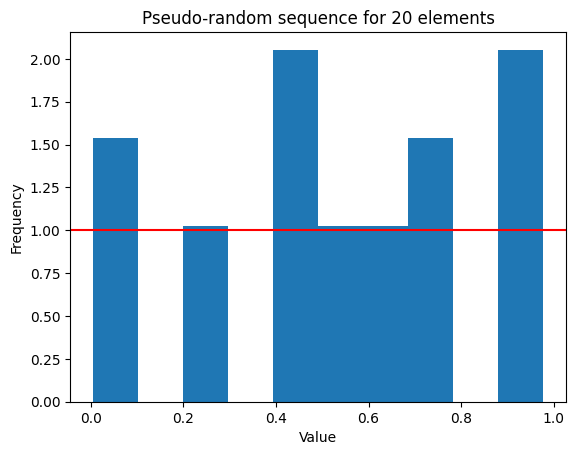

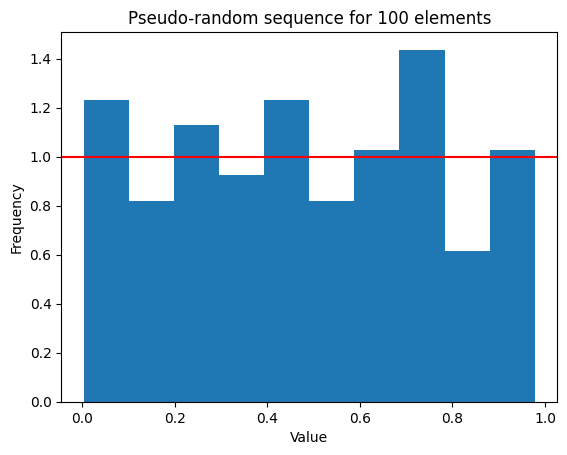

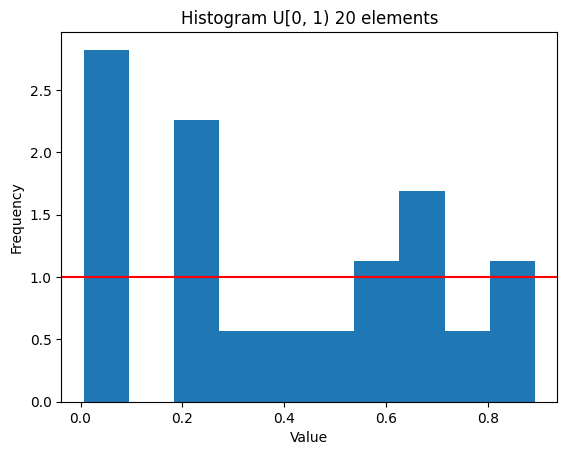

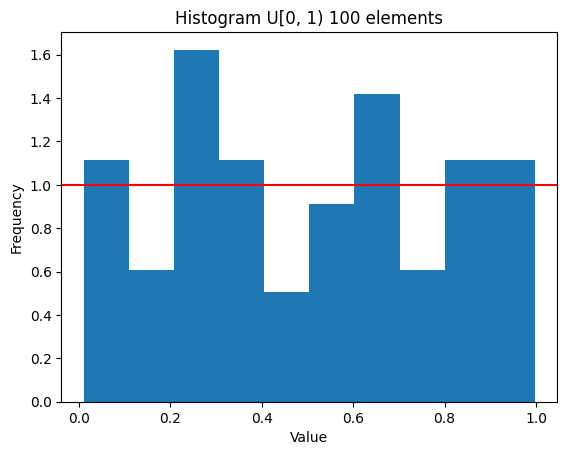

In [24]:
# d)
def plot_seq(seq):
    plt.hist(seq, bins=10, density=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Pseudo-random sequence for {len(seq)} elements')
    plt.axhline(y=1, color='r', linestyle='-')
    plt.show()
    
# random [0, 1)
def random_0_1():
    rand = 1
    while rand == 1:
        rand = random.random()
    return rand

def generate_rand_seq(n):
    seq = []
    for _ in range(n):
        seq.append(random_0_1())
    return seq

seqU20 = generate_rand_seq(20)
seqU100 = generate_rand_seq(100)

def plot_hist(seq):
    plt.title(f"Histogram U[0, 1) {len(seq)} elements")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.axhline(y=1, color='r', linestyle='-', label='U[0, 1)]')
    plt.hist(seq, bins=10, density=True)
    plt.show()

plot_seq(seq20)
plot_seq(seq100)

plot_hist(seqU20)
plot_hist(seqU100)


These density plots compared to pdf of U[0, 1) also match quite well, despite relatively small number of samples.

Now h0 hypothesis will be tested:
h0: Mean from sequence(20) is equal to 0.5
For sequence(20)

and h0: Mean from sequence(100) is equal to 0.5
For sequence(100)

In order to test these hypotheses I decided to estimate confidence intervals using bootstrap method. Using n=10.000 samples and alpha = 0.01. Which gives me 99% conf intervals.

In [25]:
# e)
def bootstrap(seq, n, alpha):
    means = []
    for _ in range(n):
        sample = np.random.choice(seq, len(seq), replace=True)
        means.append(mean(sample))
    means.sort()
    lower = means[int(n * alpha / 2)]
    upper = means[int(n * (1 - alpha / 2))]
    return lower, upper

n = 10_000
alpha = 0.01
lower, upper = bootstrap(seq20, n, alpha)
print(f"Bootstrap for seq20: [{lower}, {upper}]")

lower, upper = bootstrap(seq100, n, alpha)
print(f"Bootstrap for seq100: [{lower}, {upper}]")

Bootstrap for seq20: [0.3544481998454264, 0.6926120828640008]
Bootstrap for seq100: [0.4107537416143286, 0.5556608832190669]


Mean = 0.5 matches both given conf intervals meaning we can't reject null hypotheses.

Now 20 and 100 elements sequences from U[0, 1).

For 20 elements:
h0: two samples come from the same distribution.

For 100 elements:
h0: two samples come from the same distribution.

In order to compare averages from two different samples I will use T-Student test.
Central limit theorem provides normality to samples of size > 30.
For size = 20 ShapiroWilk will be used to check normality.

In [26]:
# shapiro wilk test for normality of seq20 and seqU20.
print(stats.shapiro(seq20))
print(stats.shapiro(seqU20))

ShapiroResult(statistic=0.9480834855291956, pvalue=0.33893348317996813)
ShapiroResult(statistic=0.9203207822807498, pvalue=0.10050409326330717)


Both ShapiroWilk tests passed normality test. Pvalue is > 0.05

In [27]:
# tstudent for two independent samples from scratch
def tstudent(seq1, seq2):
    n1 = len(seq1)
    n2 = len(seq2)
    mean1 = mean(seq1)
    mean2 = mean(seq2)
    var1 = variance(seq1)
    var2 = variance(seq2)
    t = (mean1 - mean2) / ((var1 / n1 + var2 / n2)**0.5)
    df = (var1 / n1 + var2 / n2)**2 / (var1**2 / n1**2 / (n1 - 1) + var2**2 / n2**2 / (n2 - 1))
    p = 2 * (1 - stats.t.cdf(abs(t), df))
    return t, p

t, p = tstudent(seq20, seqU20)
print(f"tstudent for seq20 and seqU20: t = {t}, p = {p}")

t, p = tstudent(seq100, seqU100)
print(f"tstudent for seq100 and seqU100: t = {t}, p = {p}")


tstudent for seq20 and seqU20: t = 1.4641732900621804, p = 0.15139282930970133
tstudent for seq100 and seqU100: t = -0.4849847449221146, p = 0.6282237173982965


For both tests we can't reject the null hypothesis, which means that the two samples come from the same distribution.